<a href="https://colab.research.google.com/github/diabetico2/Machine-Learning-pokemon/blob/main/Trabalho_Allan_e_Jean_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Base de dados carregada com sucesso!
Total de Pokémons: 800

Dados divididos e padronizados.
Modelos treinados com sucesso!
--- Resultados: Árvore de Decisão ---
Acurácia: 0.95 (94.6%)
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.97      0.97      0.97       225
        True       0.57      0.53      0.55        15

    accuracy                           0.95       240
   macro avg       0.77      0.75      0.76       240
weighted avg       0.94      0.95      0.94       240

--- Resultados: Random Forest ---
Acurácia: 0.96 (95.8%)
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.97      0.99      0.98       225
        True       0.73      0.53      0.62        15

    accuracy                           0.96       240
   macro avg       0.85      0.76      0.80       240
weighted avg       0.95      0.96      0.96       240



/tmp/ipython-input-2586902241.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Acurácia', data=resultados, palette='viridis')


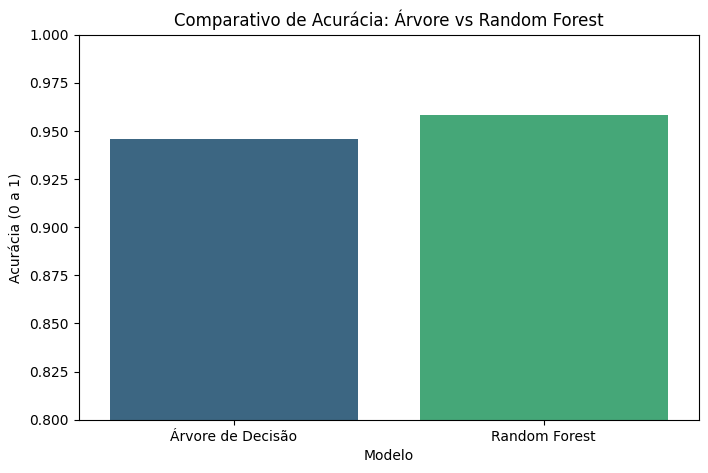

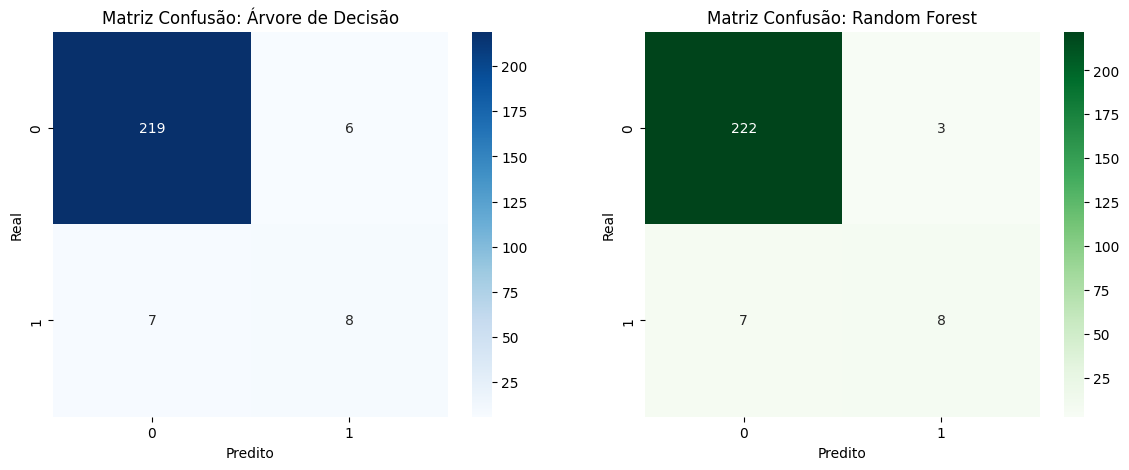

/tmp/ipython-input-2586902241.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_rf, y=importances_rf.index, palette='magma')


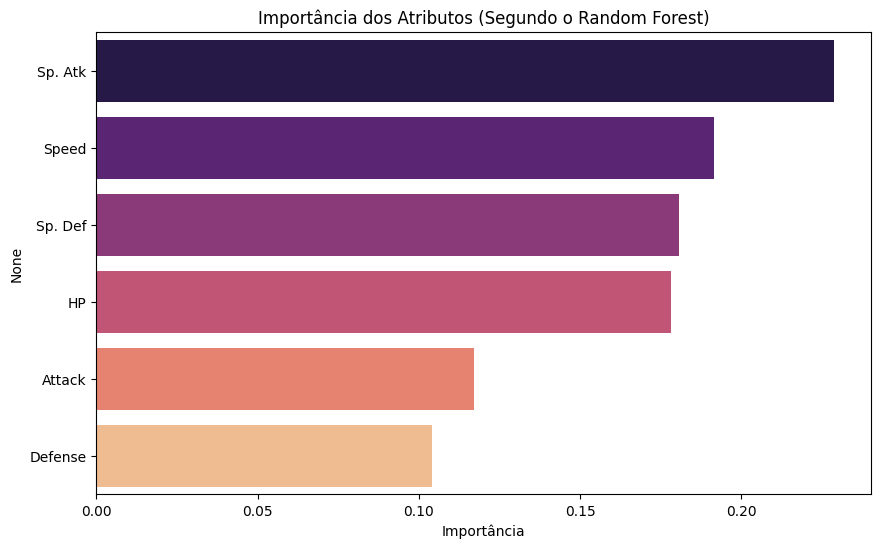

In [ ]:
# --- 1. CONFIGURAÇÃO E CARREGAMENTO (SELEÇÃO) ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Importando os dois algoritmos exigidos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Carregar dataset (Link direto para garantir funcionalidade [cite: 23])
url = "https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"
df = pd.read_csv(url)

# Seleção de Features (Atributos de Batalha)
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
target = 'Legendary'

print("Base de dados carregada com sucesso!")
print(f"Total de Pokémons: {df.shape[0]}")

# --- 2. PRÉ-PROCESSAMENTO E TRANSFORMAÇÃO ---
# Tratamento de nulos (se houver)
df = df.dropna(subset=features)

# Separação X (dados) e y (alvo)
X = df[features]
y = df[target]

# Divisão Treino (70%) e Teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronização (Essencial para maximizar a pontuação de 'Complexidade' )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDados divididos e padronizados.")

# --- 3. MINERAÇÃO DE DADOS (APLICAÇÃO DE 2 ALGORITMOS ) ---

# Algoritmo 1: Árvore de Decisão (O modelo base)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

# Algoritmo 2: Random Forest (O modelo complexo para comparação)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

print("Modelos treinados com sucesso!")

# --- 4. APRESENTAÇÃO E COMPARAÇÃO DE RESULTADOS [cite: 12, 22] ---

# Função auxiliar para mostrar métricas
def mostrar_resultados(nome_modelo, y_real, y_pred):
    acc = accuracy_score(y_real, y_pred)
    print(f"--- Resultados: {nome_modelo} ---")
    print(f"Acurácia: {acc:.2f} ({acc*100:.1f}%)")
    print("Relatório de Classificação:\n", classification_report(y_real, y_pred))
    return acc

# Exibir métricas textuais
acc_dt = mostrar_resultados("Árvore de Decisão", y_test, dt_pred)
acc_rf = mostrar_resultados("Random Forest", y_test, rf_pred)

# --- COMPARAÇÃO VISUAL (Para o Slide/PDF) ---
# Isso conta pontos para 'Apresentação dos Resultados'

# 1. Gráfico de Barras comparando Acurácia
resultados = pd.DataFrame({
    'Modelo': ['Árvore de Decisão', 'Random Forest'],
    'Acurácia': [acc_dt, acc_rf]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='Acurácia', data=resultados, palette='viridis')
plt.ylim(0.8, 1.0) # Ajuste de escala para ver melhor a diferença
plt.title('Comparativo de Acurácia: Árvore vs Random Forest')
plt.ylabel('Acurácia (0 a 1)')
plt.show()

# 2. Matrizes de Confusão lado a lado
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz Confusão: Árvore de Decisão')
ax[0].set_xlabel('Predito')
ax[0].set_ylabel('Real')

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Matriz Confusão: Random Forest')
ax[1].set_xlabel('Predito')
ax[1].set_ylabel('Real')

plt.show()

# 3. Feature Importance (O que cada modelo achou mais importante?)
importances_rf = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_rf, y=importances_rf.index, palette='magma')
plt.title('Importância dos Atributos (Segundo o Random Forest)')
plt.xlabel('Importância')
plt.show()